In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
plt.style.use('dark_background')
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
import plotly.io as pio
pio.renderers.default = 'colab'



In [2]:
data = pd.read_csv('Billionaire.csv')

In [3]:
data.head()

,Name,NetWorth,Country,Source,Rank,Age,Industry
0,Jeff Bezos,$177 B,United States,Amazon,1,57.0,Technology
1,Elon Musk,$151 B,United States,"Tesla, SpaceX",2,49.0,Automotive
2,Bernard Arnault & family,$150 B,France,LVMH,3,72.0,Fashion & Retail
3,Bill Gates,$124 B,United States,Microsoft,4,65.0,Technology
4,Mark Zuckerberg,$97 B,United States,Facebook,5,36.0,Technology


# Data cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2755 non-null   object 
 1   NetWorth  2755 non-null   object 
 2   Country   2755 non-null   object 
 3   Source    2755 non-null   object 
 4   Rank      2755 non-null   int64  
 5   Age       2676 non-null   float64
 6   Industry  2755 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 150.8+ KB


In [5]:
data.isnull().sum()

,0
Name,0
NetWorth,0
Country,0
Source,0
Rank,0
Age,79
Industry,0


In [6]:
data = data.dropna()

In [7]:
data.duplicated().sum()

0

In [8]:
data['NetWorth'] = data['NetWorth'].str.strip('$').str.strip('B')

In [9]:

data['NetWorth'] = data['NetWorth'].astype(float)



# Exploratory data analysis

In [10]:
data.describe()

,NetWorth,Rank,Age
count,2676.000000,2676.000000,2676.000000
mean,4.796525,1343.791106,63.113602
std,9.743198,773.724884,13.445153
min,1.000000,1.000000,18.000000
25%,1.500000,680.000000,54.000000
50%,2.300000,1362.000000,63.000000
75%,4.200000,2035.000000,73.000000
max,177.000000,2674.000000,99.000000


In [11]:
data.drop(columns = ['Rank'], axis = 'columns', inplace = True)

In [12]:
data.describe()

,NetWorth,Age
count,2676.000000,2676.000000
mean,4.796525,63.113602
std,9.743198,13.445153
min,1.000000,18.000000
25%,1.500000,54.000000
50%,2.300000,63.000000
75%,4.200000,73.000000
max,177.000000,99.000000


- Maximum networth is 177B while the minimum is 1B and average is 4.7B
- Maximum age is 99 years while minimum is 19.Average age is 64 years

# Overall analysis

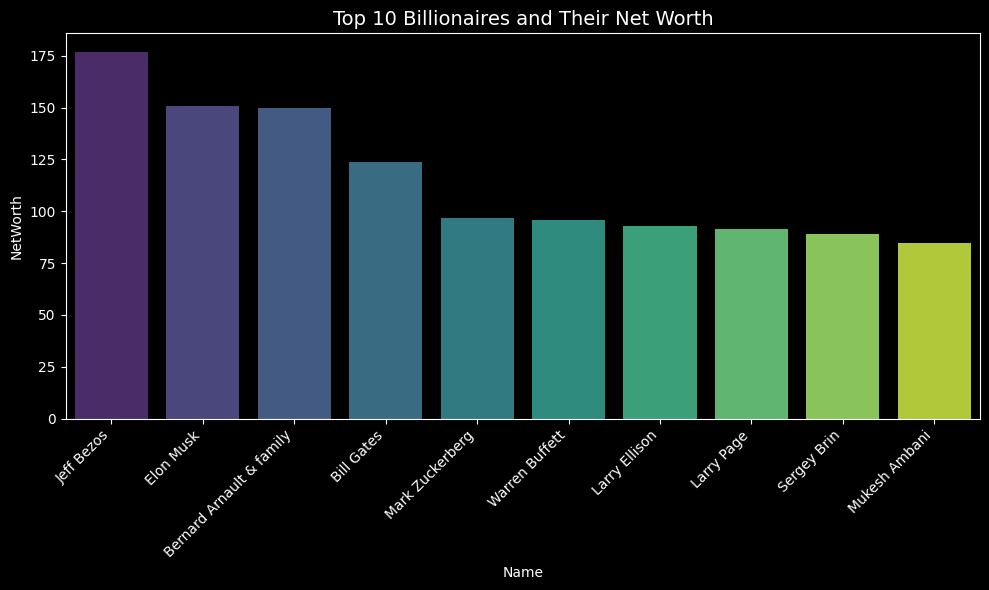

In [13]:
top_10 = data.sort_values(by='NetWorth', ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='Name', y='NetWorth', palette='viridis')
plt.title('Top 10 Billionaires and Their Net Worth', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

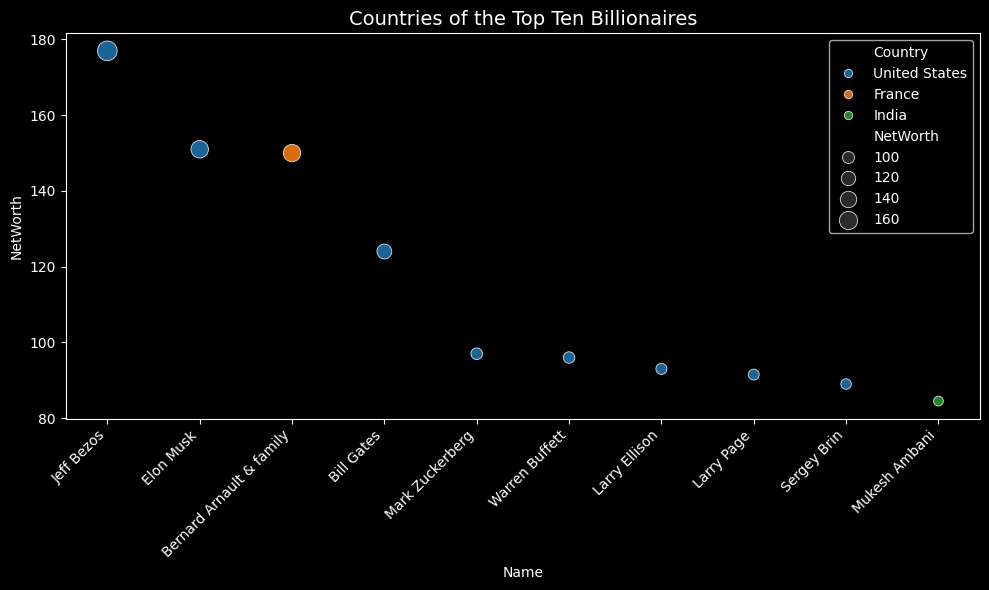

In [14]:
top_10 = data.sort_values(by='NetWorth', ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_10, x='Name', y='NetWorth', size='NetWorth', hue='Country', palette='tab10', alpha=0.85, sizes=(50, 200))
plt.title('Countries of the Top Ten Billionaires', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


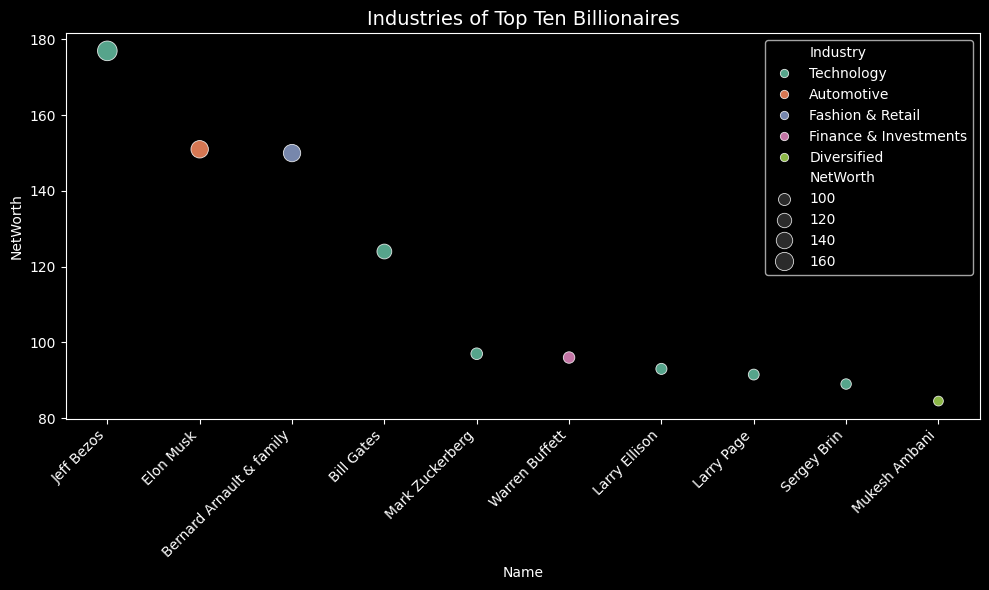

In [15]:
top_10 = data.sort_values(by='NetWorth', ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_10, x='Name', y='NetWorth', size='NetWorth', hue='Industry', palette='Set2', alpha=0.85, sizes=(50, 200))
plt.title('Industries of Top Ten Billionaires', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Analysis according to Age

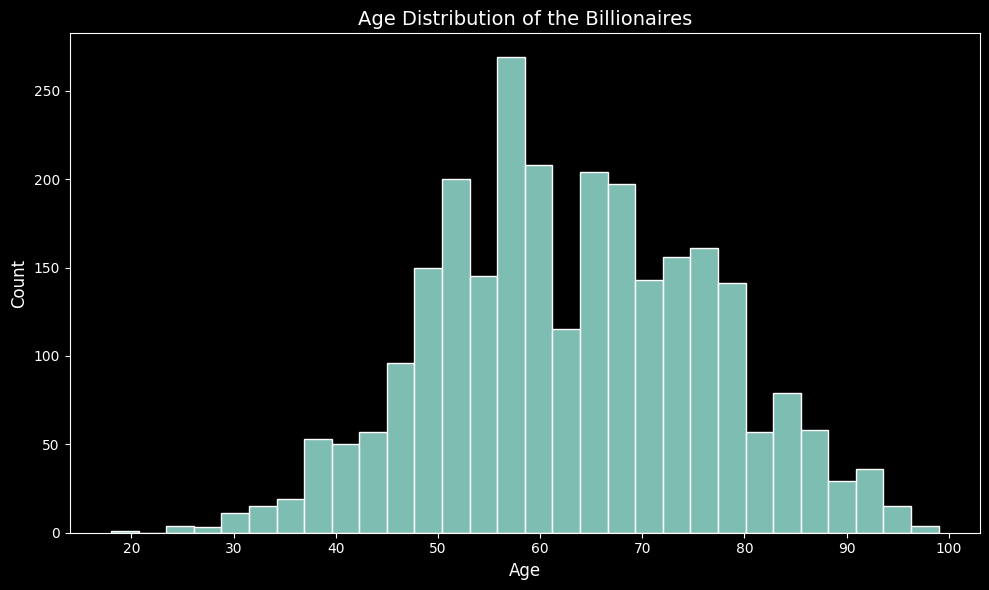

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', kde=False, palette='mako', alpha=0.9)
plt.title('Age Distribution of the Billionaires', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


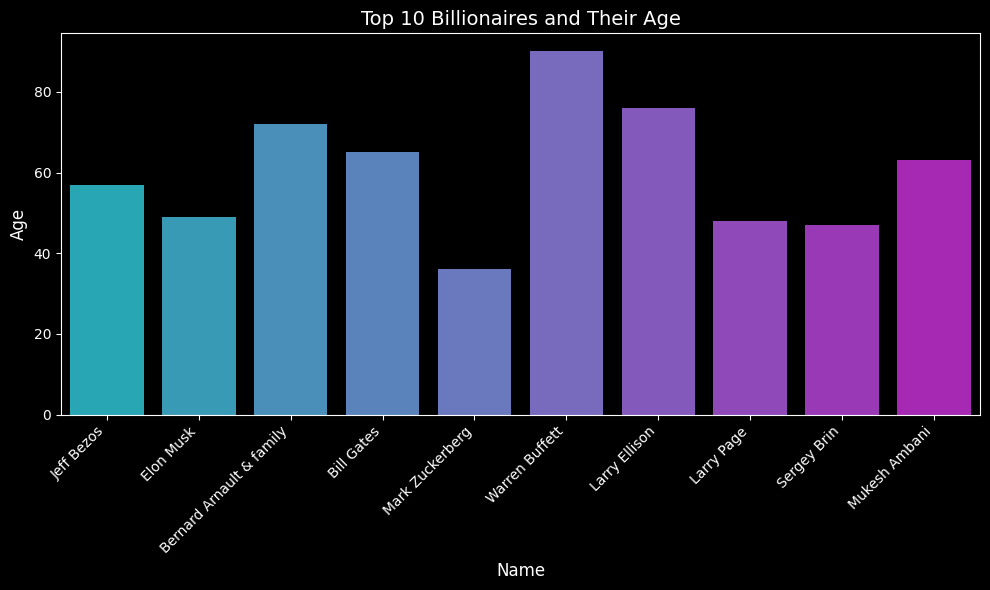

In [17]:
top_10 = data.sort_values(by='NetWorth', ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, x='Name', y='Age', palette='cool', alpha=0.8)
plt.title('Top 10 Billionaires and Their Age', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Age', fontsize=12)
plt.xlabel('Name', fontsize=12)
plt.tight_layout()
plt.show()


# Analysis according to country

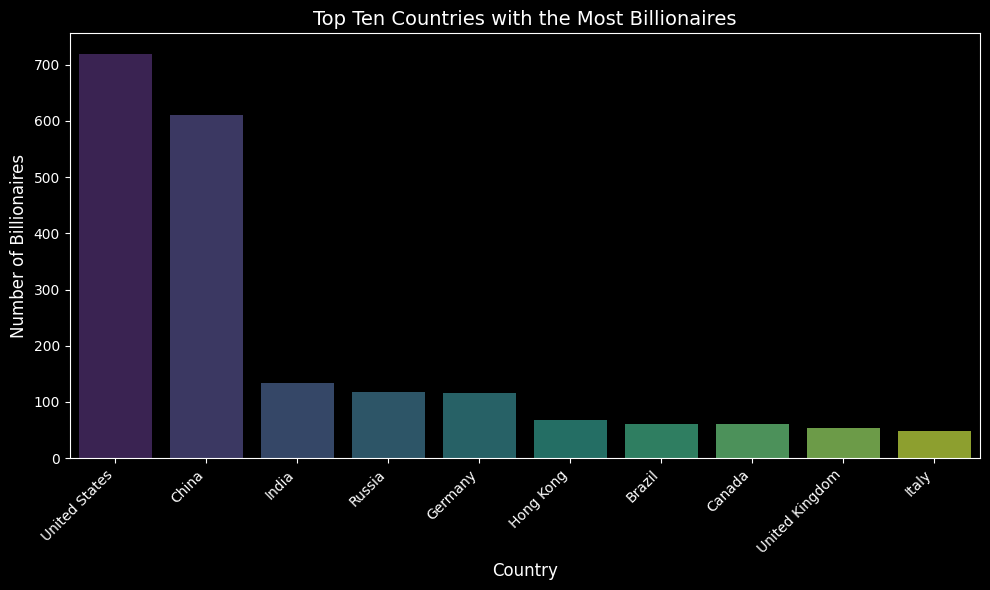

In [18]:
d1 = data['Country'].value_counts().reset_index().head(10)
d1.columns = ['Country', 'Count']  # Adjusting column names for clarity
plt.figure(figsize=(10, 6))
sns.barplot(data=d1, x='Country', y='Count', palette='viridis', alpha=0.8)
plt.title('Top Ten Countries with the Most Billionaires', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Billionaires', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.tight_layout()
plt.show()




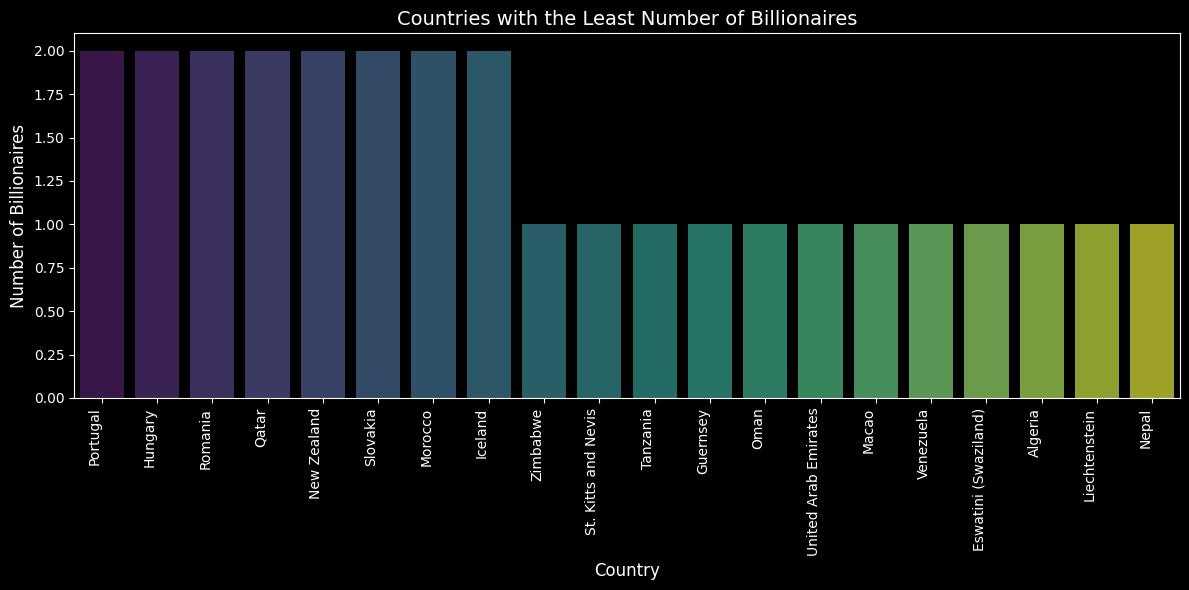

In [19]:
d1 = data['Country'].value_counts().reset_index().tail(20)
d1.columns = ['Country', 'Count']  # Renaming columns for clarity
plt.figure(figsize=(12, 6))
sns.barplot(data=d1, x='Country', y='Count', palette='viridis', alpha=0.8)
plt.title('Countries with the Least Number of Billionaires', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.ylabel('Number of Billionaires', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.tight_layout()
plt.show()


# analysis according to source

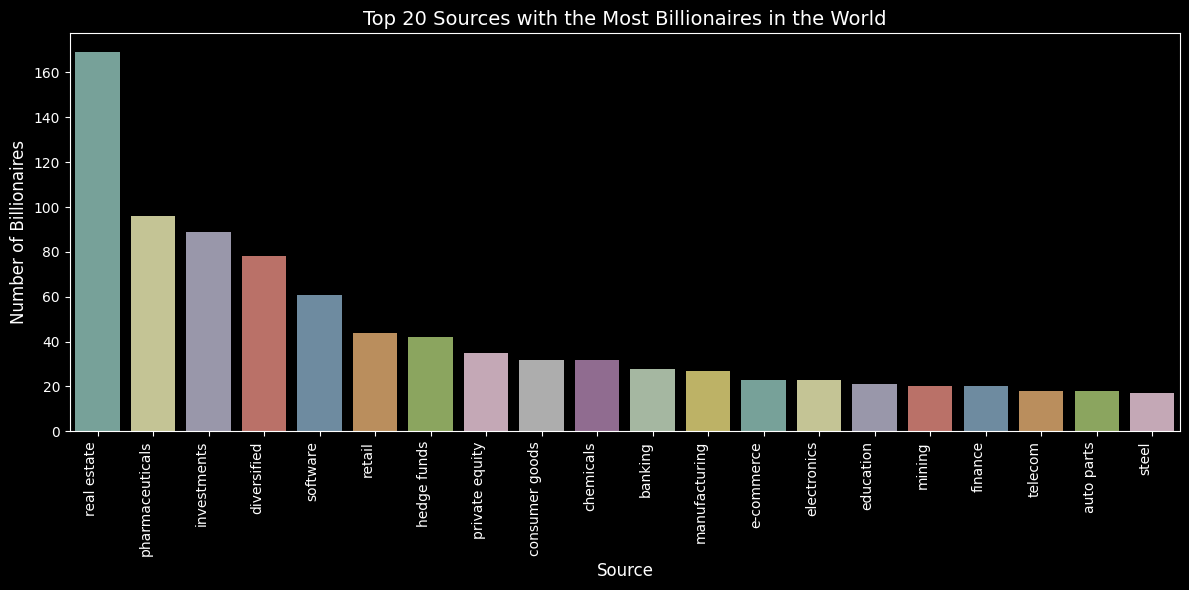

In [20]:
D1 = data['Source'].value_counts().reset_index().head(20)
D1.columns = ['Source', 'Count']  # Renamed columns for clarity
plt.figure(figsize=(12, 6))
sns.barplot(data=D1, x='Source', y='Count', palette='Set3', alpha=0.8)
plt.title('Top 20 Sources with the Most Billionaires in the World', fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.ylabel('Number of Billionaires', fontsize=12)
plt.xlabel('Source', fontsize=12)
plt.tight_layout()
plt.show()




# USA analysis

In [21]:
dataus = data[data['Country'] == 'United States']



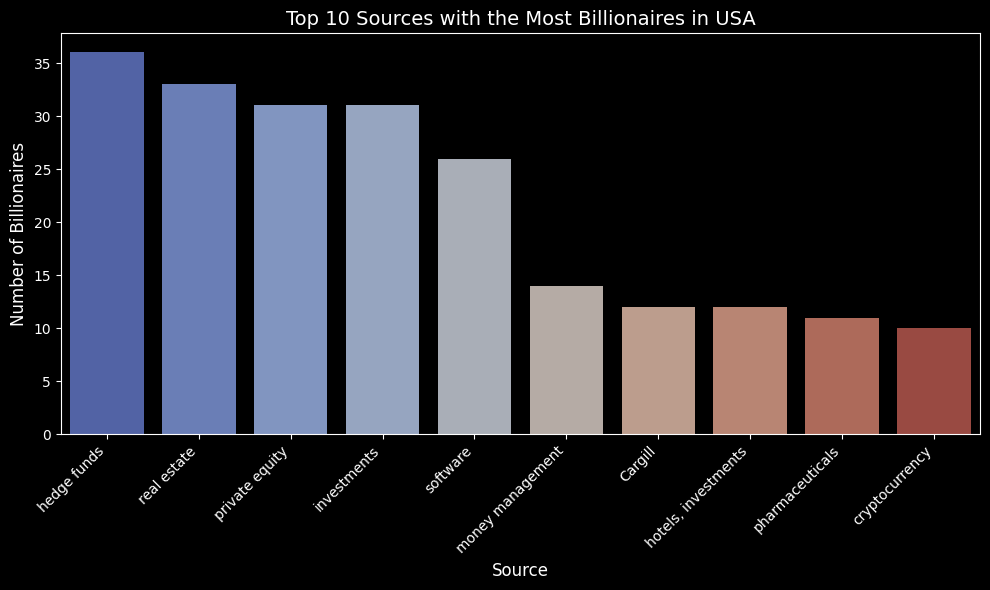

In [22]:
d1 = dataus['Source'].value_counts().reset_index().head(10)
d1.columns = ['Source', 'Count']  # Renamed columns for clarity

plt.figure(figsize=(10, 6))
sns.barplot(data=d1, x='Source', y='Count', palette='coolwarm', alpha=0.8)
plt.title('Top 10 Sources with the Most Billionaires in USA', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Billionaires', fontsize=12)
plt.xlabel('Source', fontsize=12)
plt.tight_layout()
plt.show()



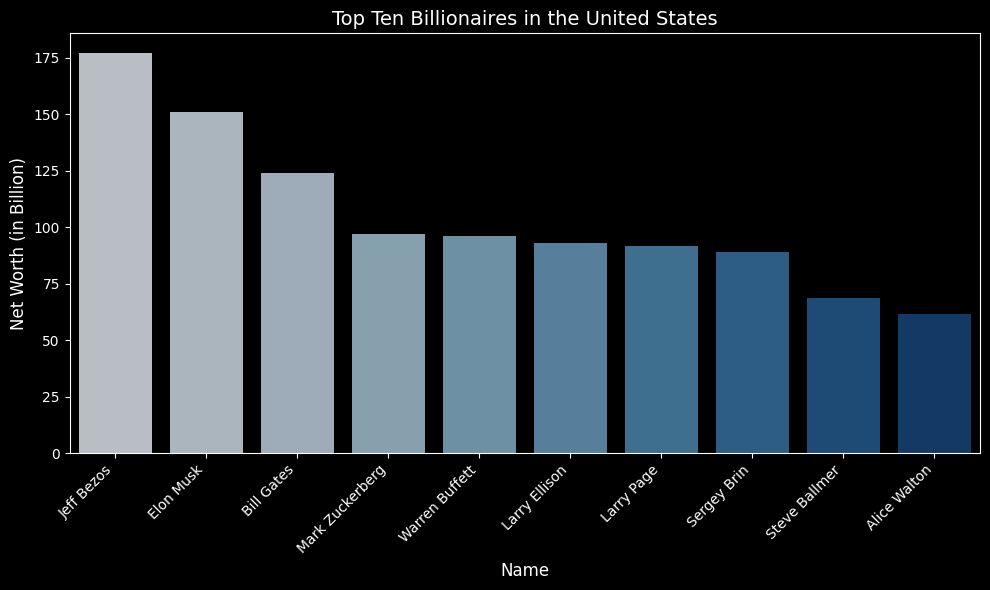

In [23]:
d2 = dataus.sort_values(by='NetWorth', ascending=False)[:10]

plt.figure(figsize=(10, 6))
sns.barplot(data=d2, x='Name', y='NetWorth', palette='Blues', alpha=0.8)
plt.title('Top Ten Billionaires in the United States', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Net Worth (in Billion)', fontsize=12)
plt.xlabel('Name', fontsize=12)
plt.tight_layout()
plt.show()


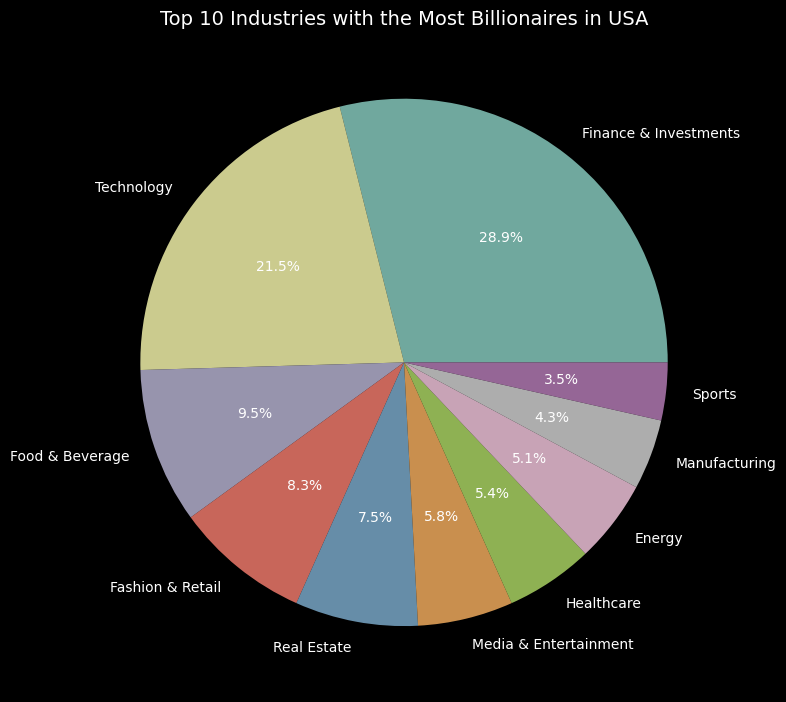

In [24]:
dataus = data[data['Country'] == 'United States']
d1 = dataus['Industry'].value_counts().reset_index().head(10)

d1.columns = ['Industry', 'Count']  # Renaming columns for clarity

plt.figure(figsize=(8, 8))
# Adjusted transparency with wedgeprops
plt.pie(d1['Count'], labels=d1['Industry'], autopct='%1.1f%%',
        colors=sns.color_palette('Set3', len(d1)), wedgeprops={'alpha': 0.8})
plt.title('Top 10 Industries with the Most Billionaires in USA', fontsize=14)
plt.tight_layout()
plt.show()




# CHINA analysis

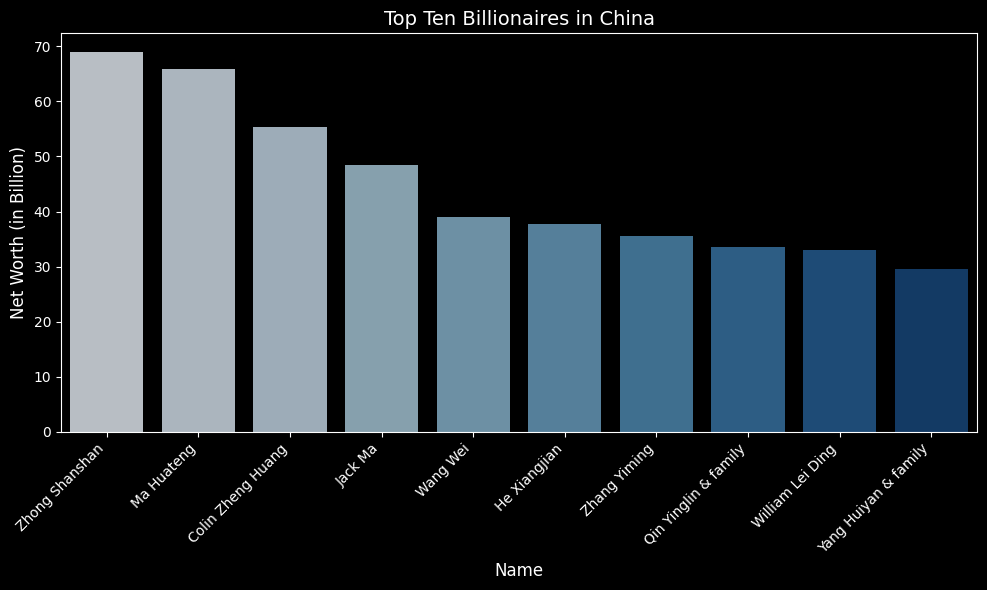

In [25]:
datachina = data[data['Country'] == 'China']
d2 = datachina.sort_values(by='NetWorth', ascending=False)[:10]

plt.figure(figsize=(10, 6))
sns.barplot(data=d2, x='Name', y='NetWorth', palette='Blues', alpha=0.8)
plt.title('Top Ten Billionaires in China', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Net Worth (in Billion)', fontsize=12)
plt.xlabel('Name', fontsize=12)
plt.tight_layout()
plt.show()


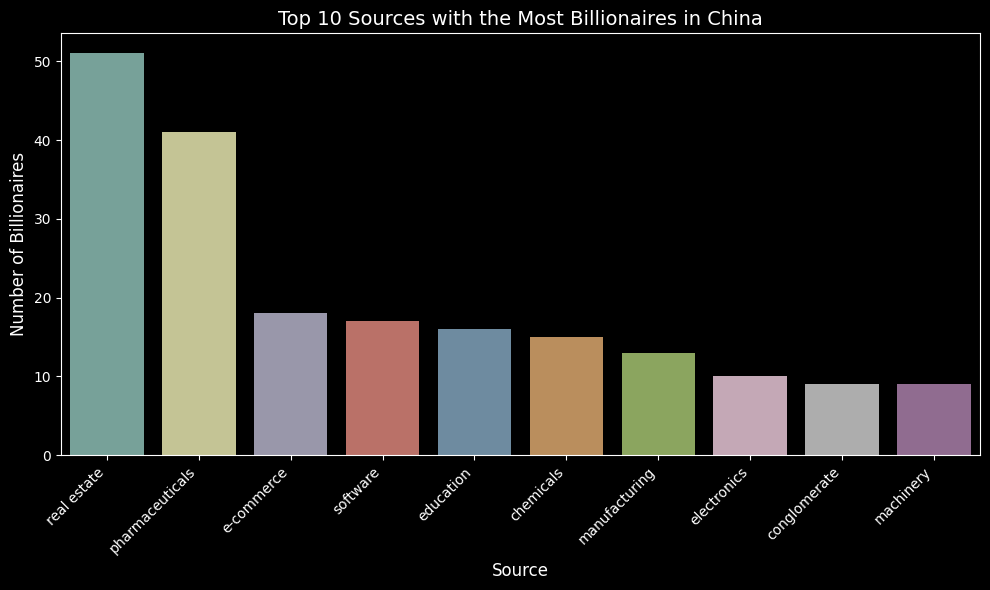

In [26]:
datachina = data[data['Country'] == 'China']
d1 = datachina['Source'].value_counts().reset_index().head(10)
d1.columns = ['Source', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=d1, x='Source', y='Count', palette='Set3', alpha=0.8)
plt.title('Top 10 Sources with the Most Billionaires in China', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Billionaires', fontsize=12)
plt.xlabel('Source', fontsize=12)
plt.tight_layout()
plt.show()




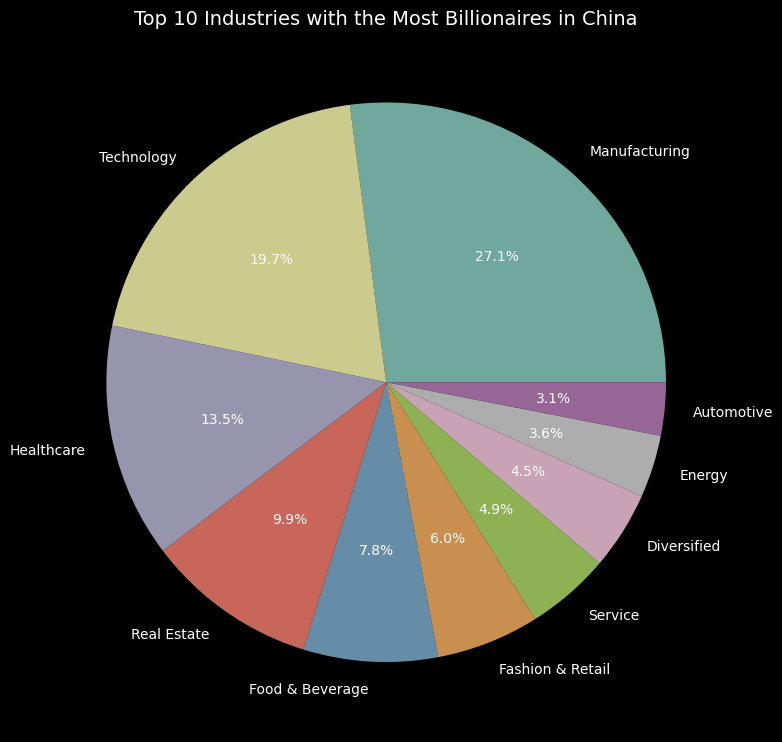

In [27]:
datachina = data[data['Country'] == 'China']
d1 = datachina['Industry'].value_counts().reset_index().head(10)

d1.columns = ['Industry', 'Count']  # Renaming columns for clarity

plt.figure(figsize=(8, 8))
# Plotting the pie chart with transparency
plt.pie(d1['Count'], labels=d1['Industry'], autopct='%1.1f%%',
        colors=sns.color_palette('Set3', len(d1)), wedgeprops={'alpha': 0.8})
plt.title('Top 10 Industries with the Most Billionaires in China', fontsize=14)
plt.tight_layout()
plt.show()



## summary

- Jeff Bezos and Elon Musk who are from United States are richest in the world and their Networth are more than 150 billion.
- Real Estate and Pharmaceuticals are the sources with the most billionaires in the world.
- Finance & investment and Technology are the industries with the most billionaires in the world.
- Top countries with the most number of billionaires are United States and China with  over 66 percent of the total billionaires coming from those  two countries.
- Hedge funds and Real Estate are the sources with the most billionaires in the United States.